In [1]:
# Update sklearn to prevent version mismatches
### !pip install sklearn --upgrade
### %conda install --update-deps scikit-learn

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
### !pip install joblib
### %conda install --update-deps joblib

In [3]:
import pandas as pd
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

# Set max number of columns to be displayed
pd.set_option('display.max_columns', 60)
#### pd.set_option('display.max_colwidth', 70)

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE


# Exploratory Analysis

### Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")

In [5]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
# Confirm that there is no nulls
df.isna().sum().sum()

0

In [7]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

### Select Features (Columns)

Description of exoplanet dataset columns can be found [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).


In [8]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

#### Remove Unnecessary Features

To make dataframe easily readable we will remove all uncertainties columns that are representing errors.

In [9]:
# Set features, drop all features representing errors
selected_features = df.drop(columns=list(df.filter(like='err')))
print(selected_features.shape)
selected_features.head()

(6991, 21)


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


### Data and Target Features

#### Defining Data and Target Features

In [10]:
# Define data features
X = selected_features.drop('koi_disposition', axis=1)

# Define feature_names for later use
feature_names = X.columns

# Define target feature
y = selected_features['koi_disposition']

print(X.shape, y.shape)

(6991, 20) (6991,)


### Distributions of Data (Numeric) Features

#### Plotting the Histogram Grid

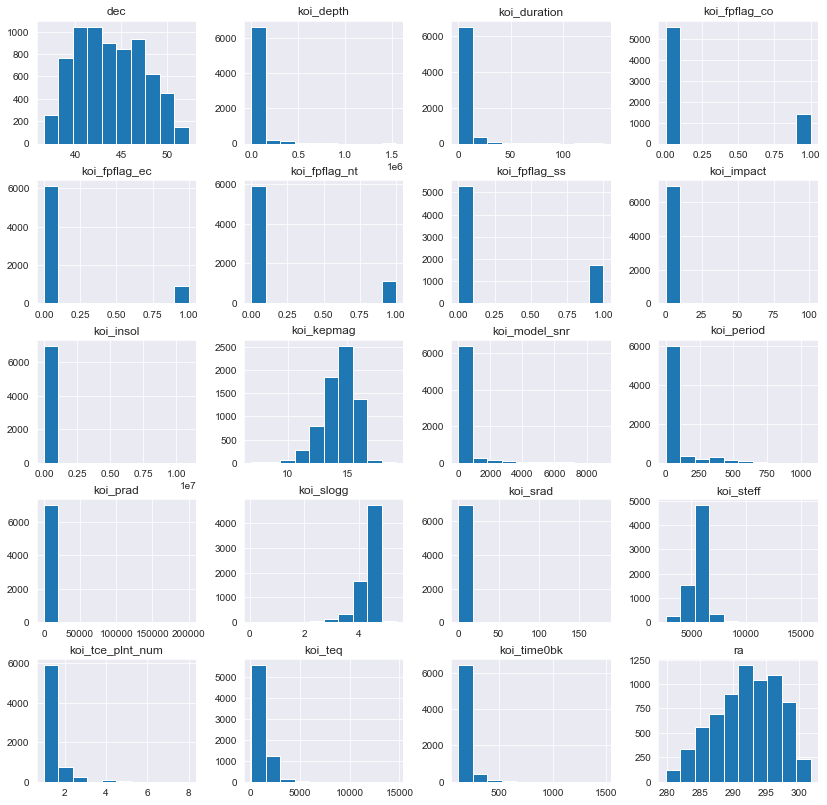

In [11]:
# Plot histogram grid
X.hist(figsize=(14,14))

plt.show()

From decision tree feature performances, we could see that 4 koi_fpflag* (1 or 0) features are among first five important features (1, 2, 3, 5).

#### Summary Statistics for  Data Features

In [12]:
X.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,164.488820,0.730631,5.549368,2.391190e+04,121.194193,1095.152768,8.263769e+03,276.038764,1.233729,5700.682449,4.305049,1.740749,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,67.020475,3.346956,6.425205,8.241240e+04,3519.737626,856.234809,1.775255e+05,824.788481,0.650089,802.060405,0.439238,5.903415,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,120.515914,0.000000,0.167000,7.500000e+00,0.140000,92.000000,2.000000e-02,1.600000,1.000000,2661.000000,0.047000,0.109000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,132.683917,0.198000,2.446000,1.604000e+02,1.400000,554.000000,2.227000e+01,12.400000,1.000000,5297.000000,4.209000,0.829000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,136.739230,0.539000,3.793000,4.245000e+02,2.420000,888.000000,1.466700e+02,23.700000,1.000000,5757.000000,4.436000,0.999000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,169.937005,0.891000,6.197500,1.533250e+03,15.965000,1397.500000,9.006700e+02,82.250000,1.000000,6110.000000,4.543000,1.357000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,180.013000,301.720760,52.336010,19.065000


### Correlations

In [13]:
# Calculate correlations between numeric features
correlations = X.corr()

correlations

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.249381,0.072748,0.287118,-0.043942,0.054410,-0.003013,-0.000566,-0.079241,0.035902,0.105008,-0.128576,0.045535,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.111469,0.042021,0.014224,0.423883,-0.000752,0.191842,0.031315,0.439764,-0.184721,0.104600,-0.053394,0.032638,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.121452,0.007501,-0.048398,-0.132939,-0.013284,0.259045,0.018086,-0.134479,-0.122911,0.016750,-0.012101,0.032129,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.099760,-0.004913,0.023232,-0.088001,-0.011078,0.218624,0.034874,-0.091905,-0.103976,0.012411,0.003066,0.022411,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.655186,0.067571,0.324488,-0.064272,0.072790,-0.390006,-0.021743,-0.081456,-0.022590,0.021806,-0.055410,0.017590,-0.030675,0.011226,-0.045959
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,1.000000,0.055597,0.200979,-0.037195,0.039814,-0.315510,-0.021307,-0.058522,-0.006344,0.003641,-0.001929,-0.004831,-0.016981,0.010483,0.021898
koi_impact,0.072748,0.042021,0.007501,-0.004913,0.067571,0.055597,1.000000,0.038594,0.001088,0.738676,-0.012648,-0.003793,-0.002429,-0.006689,0.013467,-0.073798,0.030429,0.018979,0.000357,-0.000494
koi_duration,0.287118,0.014224,-0.048398,0.023232,0.324488,0.200979,0.038594,1.000000,0.072860,0.041484,-0.182678,-0.017367,0.073401,-0.011103,0.102602,-0.129763,0.016414,0.038933,-0.034985,-0.100665
koi_depth,-0.043942,0.423883,-0.132939,-0.088001,-0.064272,-0.037195,0.001088,0.072860,1.000000,0.000740,0.076197,-0.006029,0.588988,-0.094301,0.124717,-0.010089,-0.017221,0.019420,-0.016085,0.002357
koi_prad,0.054410,-0.000752,-0.013284,-0.011078,0.072790,0.039814,0.738676,0.041484,0.000740,1.000000,-0.003743,0.002439,-0.003568,-0.005195,-0.014998,-0.105581,0.061426,0.007930,0.003478,-0.023326


It is difficult tos see any relationship from the above table.

To get a better view of correlations we wiil create a heatmap plot

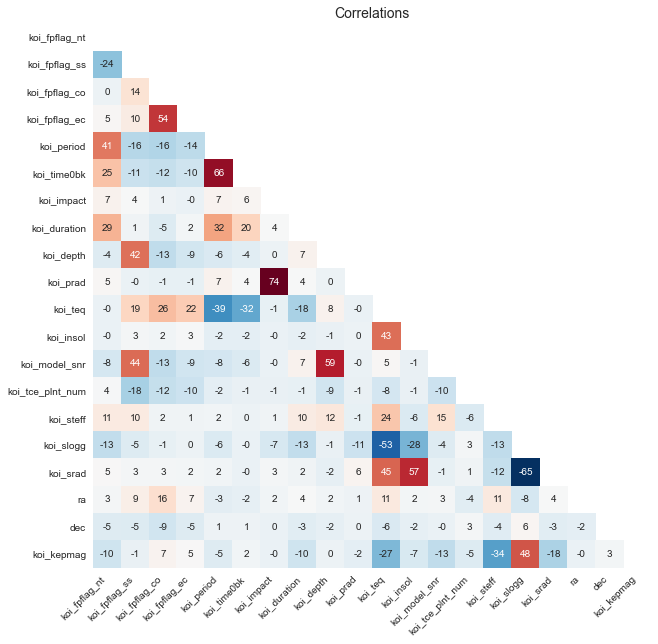

In [14]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(10,10))

# Plot heatmap of annotated correlations; change background to white
with sns.axes_style('white'):
    sns.heatmap(correlations*100, 
                cmap='RdBu_r', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)
    
plt.title('Correlations', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45, horizontalalignment='right')
#plt.xticks(rotation=45)
plt.show()


### Distributions of the Target Feature

In [15]:
# Frequency of target feature
y.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

Let's define a small helper funtcion which displays count and percentage per class of the target feature.

In [16]:
# Function to display count and percentage per class of target feature
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    dff = pd.DataFrame(np.array(kv).T, columns=['koi_disposition','Count'])
    dff['Count'] = dff['Count'].astype('int64')
    dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
    return dff.sort_values('Count',ascending=False)

In [17]:
# Let's use the function
class_count(y)

,koi_disposition,Count,%
1,FALSE POSITIVE,3504,50.12
0,CONFIRMED,1800,25.75
2,CANDIDATE,1687,24.13


In [18]:
# Define target_names for later use
target_names = sorted(list(class_count(y).koi_disposition.values))
target_names

['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']

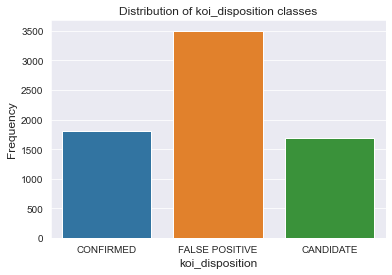

In [19]:
# Class distribution for koi_disposition
sns.countplot(y)
plt.title('Distribution of koi_disposition classes')
plt.xlabel('koi_disposition', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

Our dataset is slightly imbalanced. Using SMOTE technique did not make any improvement.

# Create a Train Test Split

Use `koi_disposition` for the y values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4893 2098 4893 2098


In [21]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
1375,0,0,0,0,7.542358,132.961170,0.318,4.73000,132.5,1.59,1054,292.19,25.8,2,5711,4.221,1.391,283.19208,41.305389,13.353
386,0,0,0,0,6.581477,174.787814,0.137,3.08960,2318.9,4.56,881,142.63,116.2,1,5188,4.400,0.973,297.31598,46.023258,15.471
111,0,0,0,0,8.203970,169.691380,0.823,2.96670,1024.4,3.01,742,71.50,54.4,1,5015,4.499,0.826,286.56570,41.808399,15.376
3737,0,1,0,0,29.015853,138.402477,12.223,7.19844,71432.0,1183.06,592,29.11,1268.8,1,5783,4.415,0.941,296.93976,42.691921,15.546
6938,1,0,0,0,229.957537,326.018400,1.175,7.59000,400.0,43.78,444,9.22,10.2,1,6419,3.978,2.057,295.97794,50.771481,10.505


In [22]:
y_test

5233         CONFIRMED
269          CANDIDATE
6828         CANDIDATE
2209         CONFIRMED
6927    FALSE POSITIVE
             ...      
5408    FALSE POSITIVE
5683    FALSE POSITIVE
6450         CANDIDATE
6238    FALSE POSITIVE
4987         CANDIDATE
Name: koi_disposition, Length: 2098, dtype: object

In [23]:
# Check class distribution for y_test
class_count(y_test)

,koi_disposition,Count,%
2,FALSE POSITIVE,1052,50.14
0,CONFIRMED,540,25.74
1,CANDIDATE,506,24.12


In [24]:
# Check class distribution for y_test
class_count(y_train)

,koi_disposition,Count,%
1,FALSE POSITIVE,2452,50.11
0,CONFIRMED,1260,25.75
2,CANDIDATE,1181,24.14


They seem equally distributed.

# Pre-processing

### Scaling

Scale the data using the MinMaxScaler

In [25]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



### Logistic Regression Classifier

In [26]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=10)
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [27]:
DTC_Train_Score = dtc.score(X_train_scaled, y_train)
DTC_Test_Score = dtc.score(X_test_scaled, y_test)                        
print(f"Training Data Score: {DTC_Train_Score}")
print(f"Testing Data Score: {DTC_Test_Score}")

Training Data Score: 1.0
Testing Data Score: 0.8617731172545281


In [28]:
# Predictions
pred = dtc.predict(X_test_scaled)
pred

array(['CANDIDATE', 'CONFIRMED', 'CONFIRMED', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [29]:
pd.DataFrame({"Prediction": pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,CANDIDATE,CONFIRMED
1,CONFIRMED,CANDIDATE
2,CONFIRMED,CANDIDATE
3,CONFIRMED,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
2093,FALSE POSITIVE,FALSE POSITIVE
2094,FALSE POSITIVE,FALSE POSITIVE
2095,CANDIDATE,CANDIDATE
2096,FALSE POSITIVE,FALSE POSITIVE


### Validation

Let' start with confusion matrix

In [30]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 378  123    5]
 [ 134  398    8]
 [   7   13 1032]]


Our data is sltghtly imbalanced so we will use normalized confusion matrix as well.

In [31]:
# Normalized confusion matrix
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.75 0.24 0.01]
 [0.25 0.74 0.01]
 [0.01 0.01 0.98]]


It is not so easy to get the storu from just numbers. 

This is why hy we will create a heatmap plot for both matrices sid e by side.

In [32]:
# Function to display confusion matrix and its normalized copy side by side
def plot_conf_mat_w_and_wo_norm(model):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle(model, fontsize=14)
    f.subplots_adjust(top=0.85, wspace=0.2)

    # confusion matrix without normalization
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='d',
                cbar=True,
                square=True,
                cmap='Reds',
                ax=ax1)

    ax1.set_xticklabels(labels=target_names, size=9)
    ax1.set_yticklabels(labels=target_names, size=9, va='center')
    ax1.set_title('Confusion Matrix w/o Normalization')
    ax1.set_xlabel('Predicted Labels', size=12)
    ax1.set_ylabel('True Labels', size=12)

    # normalized confusion matrix
    matn = mat / mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matn,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='.2f',
                cbar=True,
                square=True,
                cmap='Reds',
                vmin = 0,
                vmax = 1,
                ax=ax2)

    ax2.set_xticklabels(labels=target_names, size=9)
    ax2.set_yticklabels(labels=target_names, size=9, va='center')
    ax2.set_title('Normalized Confusion Matrix')
    ax2.set_xlabel('Predicted Labels', size=12)
    ax2.set_ylabel('True Labels', size=12)

    plt.show()

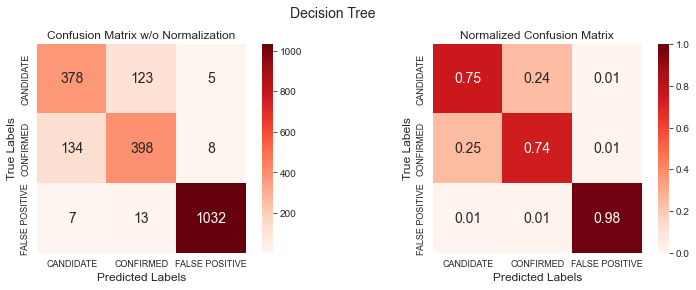

In [33]:
model = 'Decision Tree'
plot_conf_mat_w_and_wo_norm(model)

In [34]:
# Display classification report
print(classification_report(y_test, pred, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.75      0.74       506
     CONFIRMED       0.75      0.74      0.74       540
FALSE POSITIVE       0.99      0.98      0.98      1052

      accuracy                           0.86      2098
     macro avg       0.82      0.82      0.82      2098
  weighted avg       0.86      0.86      0.86      2098



"False Positive" are almost 99% predicted, but part of that could be caused by imbalanced dataset. "Candidate" has a slightly worse precission but slightly better recall than "Confirmed".

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [35]:
dtc_ht = tree.DecisionTreeClassifier(random_state=10)

In [36]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

param_grid = {
            'max_leaf_nodes': [2, 10, 20, 30], 
            'min_samples_split': [2, 3, 4],
            'criterion': ['gini', 'entropy']
            }

grid = GridSearchCV(dtc_ht, param_grid, verbose=3)


In [37]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.502, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.502, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.501, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.501, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.501, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, score=0.502

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=4, score=0.501, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=4, score=0.501, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, score=0.867, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, score=0.872, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, score=0.886, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, score=0.874, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, m

[CV]  criterion=entropy, max_leaf_nodes=2, min_samples_split=4, score=0.502, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=2, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=2, min_samples_split=4, score=0.502, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=2, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=2, min_samples_split=4, score=0.501, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=2, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=2, min_samples_split=4, score=0.501, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=2, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=2, min_samples_split=4, score=0.501, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=10, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=10, min_samples_split=2, score=0.868, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=10, min_samples_split=2 .......
[CV]  criterion=entropy, ma

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.9s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 10, 20, 30],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [38]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_leaf_nodes': 20, 'min_samples_split': 2}
0.8812596217917786


In [39]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 10,
 'splitter': 'best'}

In [40]:
# Define the best estimator, it will be needed for feature importance
# but we can use it instead of grid anywhere else as well
dtg = grid.best_estimator_

In [41]:
print(f"Training Data Score: {dtg.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dtg.score(X_test_scaled, y_test)}")

Training Data Score: 0.897200081749438
Testing Data Score: 0.8965681601525262


The score has been improved after hyperparameters tuning.

In [42]:
# Predictions
pred = dtg.predict(X_test_scaled)
pred

array(['CANDIDATE', 'CONFIRMED', 'CANDIDATE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [43]:
pd.DataFrame({"Prediction": pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,CANDIDATE,CONFIRMED
1,CONFIRMED,CANDIDATE
2,CANDIDATE,CANDIDATE
3,CONFIRMED,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
2093,FALSE POSITIVE,FALSE POSITIVE
2094,FALSE POSITIVE,FALSE POSITIVE
2095,CANDIDATE,CANDIDATE
2096,FALSE POSITIVE,FALSE POSITIVE


### Validation after Greadsearch

In [44]:
# Display classification report
print(classification_report(y_test, pred, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.80      0.79      0.79       506
     CONFIRMED       0.81      0.80      0.80       540
FALSE POSITIVE       0.99      1.00      0.99      1052

      accuracy                           0.90      2098
     macro avg       0.86      0.86      0.86      2098
  weighted avg       0.90      0.90      0.90      2098



### Validation

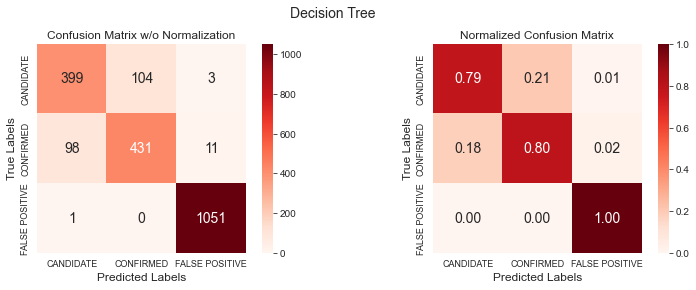

In [45]:
plot_conf_mat_w_and_wo_norm(model)

In [46]:
class_count(y_test)

,koi_disposition,Count,%
2,FALSE POSITIVE,1052,50.14
0,CONFIRMED,540,25.74
1,CANDIDATE,506,24.12


In [47]:
class_count(pred)

,koi_disposition,Count,%
2,FALSE POSITIVE,1065,50.76
1,CONFIRMED,535,25.50
0,CANDIDATE,498,23.74


### Feature Importances

In [48]:
# Rank the features by importance
feat_imp = pd.Series(dtg.feature_importances_, feature_names).sort_values(ascending=False)
feat_imp

koi_fpflag_co       0.252306
koi_fpflag_nt       0.240305
koi_fpflag_ss       0.232755
koi_model_snr       0.171111
koi_fpflag_ec       0.039831
koi_impact          0.022559
koi_duration        0.012029
koi_period          0.009984
koi_tce_plnt_num    0.007612
koi_prad            0.004385
ra                  0.004092
koi_time0bk         0.003030
dec                 0.000000
koi_depth           0.000000
koi_teq             0.000000
koi_insol           0.000000
koi_steff           0.000000
koi_slogg           0.000000
koi_srad            0.000000
koi_kepmag          0.000000
dtype: float64

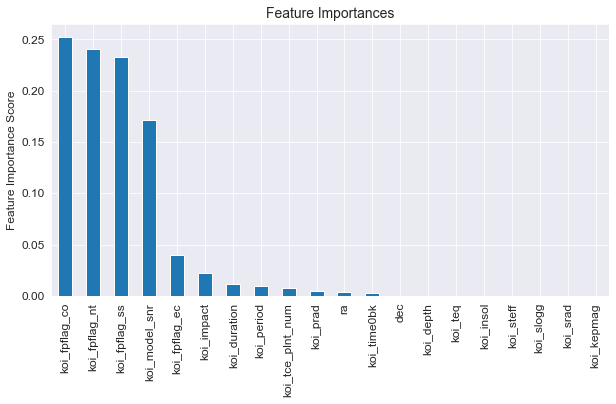

In [49]:
# Plot feature importances
plt.figure(figsize=(10,5))
feat_imp.plot(kind='bar', fontsize=12)
plt.ylabel('Feature Importance Score', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.show()

We are going to drop features starting from the worst ranked feature. In each iteration we will add one more feature and scale, train and score data.

In [50]:
for n in range(1, 17):
    fd = feat_imp.index.tolist()[-n:]

    X_if_train = X_train.drop(columns=fd) 
    X_if_test = X_test.drop(columns=fd)
    y_if_train = y_train
    y_if_test = y_test
    
    X_if_scaler = MinMaxScaler().fit(X_if_train)
    X_if_train_scaled = X_if_scaler.transform(X_if_train)
    X_if_test_scaled = X_if_scaler.transform(X_if_test)

    dtc_if = tree.DecisionTreeClassifier(random_state=10, criterion='gini', max_leaf_nodes=20, min_samples_split=2)
    dtc_if.fit(X_if_train_scaled, y_if_train)

    print("=" * 30)
    print(f"Number of dropped Features: {n}")
    ## print(f"Training Data Score: {dtc_if.score(X_if_train_scaled, y_if_train)}")
    print(f"Testing Data Score: {dtc_if.score(X_if_test_scaled, y_if_test)}")


Number of dropped Features: 1
Testing Data Score: 0.8965681601525262
Number of dropped Features: 2
Testing Data Score: 0.8965681601525262
Number of dropped Features: 3
Testing Data Score: 0.8965681601525262
Number of dropped Features: 4
Testing Data Score: 0.8965681601525262
Number of dropped Features: 5
Testing Data Score: 0.8965681601525262
Number of dropped Features: 6
Testing Data Score: 0.8965681601525262
Number of dropped Features: 7
Testing Data Score: 0.8965681601525262
Number of dropped Features: 8
Testing Data Score: 0.8965681601525262
Number of dropped Features: 9
Testing Data Score: 0.8932316491897044
Number of dropped Features: 10
Testing Data Score: 0.8965681601525262
Number of dropped Features: 11
Testing Data Score: 0.8951382268827455
Number of dropped Features: 12
Testing Data Score: 0.894184938036225
Number of dropped Features: 13
Testing Data Score: 0.8937082936129648
Number of dropped Features: 14
Testing Data Score: 0.8984747378455672
Number of dropped Features: 15

No big difference in score until we drop 10 trees, then slight changes until we drop 15 trees.

## Save the Model

In [51]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib

# We are saving our grid model
filename = 'damir_zunic_decision_tree.sav'
joblib.dump(dtg, filename)

['damir_zunic_decision_tree.sav']

## Loading the Model

In [52]:
# load the model
dt_model = joblib.load(filename)
print(dt_model.score(X_test_scaled, y_test))

0.8965681601525262
